In [4]:
import pymongo
import math 
# import re
import pandas as pd
import numpy as np
import pylab 
from matplotlib import pyplot as plt
# from scipy import stats 
from  qgrid import show_grid as show 
from datetime import datetime

import seaborn as sns
import re
import matplotlib as mpl 
%matplotlib inline
mpl.style.use('ggplot')
# data=pd.read_csv("runningtest.csv")


In [82]:
filenames=["opt_CG.csv","opt_MIX.csv","opt_LU.csv","opt_Stress.csv"]
data=pd.concat([pd.read_csv("asplos/"+i)for i in filenames])
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Machine,Nbprocess,RAPL_ENERGY_DRAM_0,RAPL_ENERGY_DRAM_1,RAPL_ENERGY_DRAM_all,RAPL_ENERGY_PKG_0,RAPL_ENERGY_PKG_1,RAPL_ENERGY_PKG_BOTH,RAPL_ENERGY_PKG_all,Unnamed: 0,...,bench,class,end,entryNumber,methode,powers_av_all,target,time,type,y_ax
0,Dahu30,32,90.155563,192.247208,5886.523621,1156.989105,1503.869934,2660.859039,2943.261810,77,...,CG,C,2019-08-01 08:32:00.510,1,NaN,226.404755,normal_test_CG_C_32_1,12.012,normal,normal
1,Dahu30,32,200.382881,85.523239,5958.732101,1502.841949,1190.617981,2693.459930,2979.366051,121,...,CG,C,2019-08-01 08:32:16.529,2,NaN,229.182004,normal_test_CG_C_32_2,12.014,normal,normal
2,Dahu30,32,201.097397,90.292221,6037.853210,1502.913727,1224.623260,2727.536987,3018.926605,166,...,CG,C,2019-08-01 08:32:32.546,3,NaN,232.225123,normal_test_CG_C_32_3,12.012,normal,normal
3,Dahu30,32,98.500725,209.864960,6413.491440,1282.601379,1615.778656,2898.380035,3206.745720,209,...,CG,C,2019-08-01 08:32:48.564,4,NaN,229.053266,normal_test_CG_C_32_4,13.014,normal,normal
4,Dahu30,32,98.621086,208.288612,6425.301819,1287.162140,1618.579071,2905.741211,3212.650909,256,...,CG,C,2019-08-01 08:33:04.582,5,NaN,229.475065,normal_test_CG_C_32_5,13.014,normal,normal


In [83]:
data["cpu"]=data["RAPL_ENERGY_PKG_all"]
# data["machine"]=data.apply(lambda row:row["machinename"]if np.isnan(row["Machine"])  else row["Machine"],axis=1)
data=data.loc[:,["target","Machine","bench","class","type","cpu"]]
data["Machine"]=data["Machine"].apply(lambda row:row.split("x")[1]if "x" in row else row  )
show(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [320]:
show(data.groupby(["Machine","bench","class","type"]).std())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [80]:
data2=data.copy()
data2["sensor"]=data2["sensor"].apply(lambda row: "allmodesxDahu11xn2" if row == "allmodesxDahu11" else row)
data2=data2.loc[:,["target","benchmark","mode","mode2","number","cpu"]]
data2=data2.loc[data2["mode2"]!="cacheclean"]
data2["mode2"]=data2.apply(lambda row: "sleep"if row["mode"]=="sleep"else row["mode2"],axis=1)


KeyError: 'sensor'

In [61]:
show(data2)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [77]:
def cleanData(data,groupobj=["mode2","benchmark"],measure="cpu"): 
    l=pd.DataFrame()
    for j in data.groupby(groupobj): 
        dt=pd.DataFrame(j[1])
#         dt["type"]=j[0][0]
#         dt["machine Name"]=j[0][1]
        q1=dt[measure].quantile(0.25)
        q3=dt[measure].quantile(0.75)
        irq=q3-q1
        mini= q1-1.5*irq
        maxi= q3+1.5*irq
        dt=dt[((mini<=dt[measure]) & (dt[measure]<=maxi))]
        l=pd.concat([l,dt], sort=False)
    return l


In [ ]:
sns.set_style("whitegrid") 
palette=sns.color_palette("Set2")
import matplotlib 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['besries']
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15,"axes.tickarams.size":20})
fig, axes = plt.subplots(1,1, figsize=(15, 10))
plt.subplots_adjust(wspace=0.2,hspace = 0.3 ,left = 0.15,right = 0.98)

fig=sns.violinplot(data=data3.loc[np.logical_and(data3["bench"]=="Stress",data3["class"]=="C")],y="type",hue="Machine",x="cpu",palette=palette,ax=axes)
fig.set_xlabel(xlabel="EC (mJ)")
fig.set_ylabel(ylabel="Modes")
fig.set_title("Stress-ng 50%" )
fig.tick_params(labelsize=18)
fig.legend(loc=4,fontsize=15)
plt.savefig("stressng.pdf",format="pdf")


In [137]:
show(dtx.groupby(["bench","Machine"])["cpu"].describe())

# show(dtx.head())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [326]:
data3.read_csv("data-opt.csv")

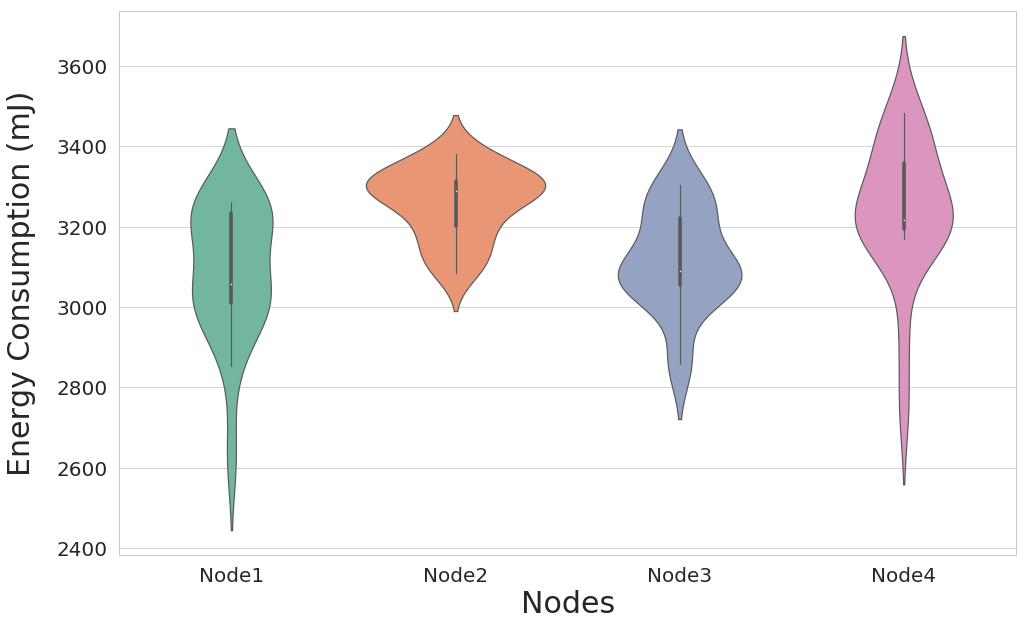

In [323]:
sns.set_style("whitegrid") 
palette=sns.color_palette("Set2")
import matplotlib 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['besries']
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":30,"axes.tickarams.size":20})
fig, axes = plt.subplots(1,1, figsize=(15, 10))
plt.subplots_adjust(wspace=0.2,hspace = 0.3 ,left = 0.15,right = 0.98)
dtx=data3.loc[data3["type"]=="normal"]
dtx=dtx.loc[dtx["bench"]=="CG"]
dtx=dtx.replace({"Dahu30":"Node1","Dahu3":"Node2","Dahu29":"Node3","Dahu25":"Node4"})
fig=sns.violinplot(data=dtx,x="Machine",y="cpu",palette=sns.color_palette("Set2"),ax=axes)
fig.set_ylabel(ylabel="Energy Consumption (mJ)",labelpad=20)
fig.set_xlabel(xlabel="Nodes")
# fig.set_title("Stress-ng 50%" )
# fig.tick_params(labelsize=18)
# fig.legend(loc=4,fontsize=30)

# fig.set_xlabel(xlabel="EC (mJ)")
# fig.set_ylabel(ylabel="Modes")
# fig.set_title("Stress-ng 50%" )
fig.tick_params(labelsize=20)
# fig.legend(loc=1,fontsize=15)
plt.savefig("motivation.pdf",format="pdf")


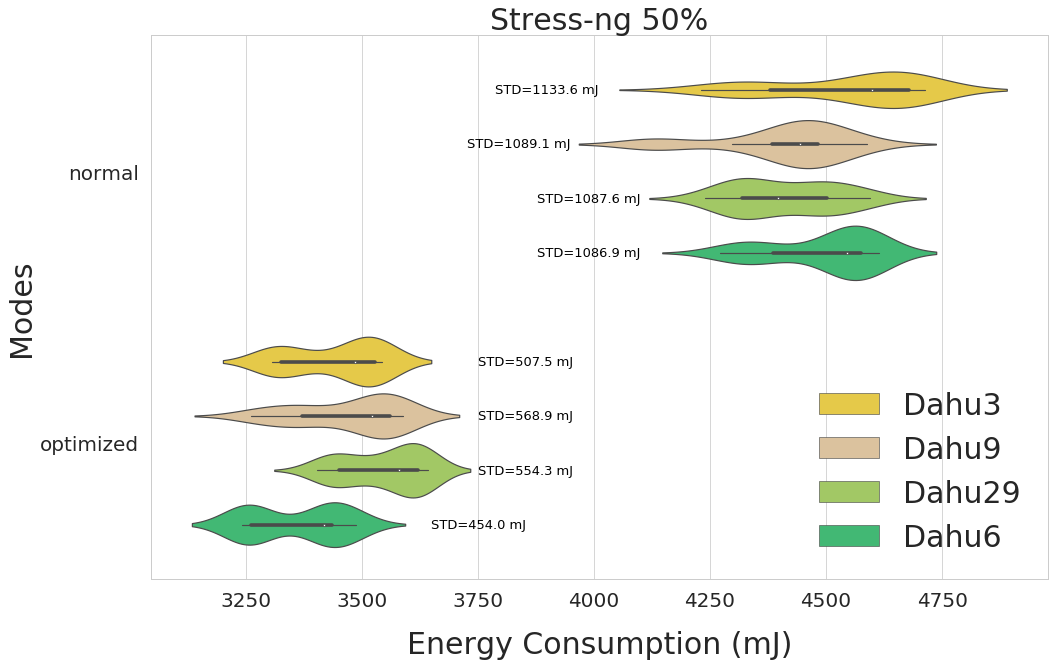

In [319]:
sns.set_style("whitegrid") 
palette=sns.color_palette("Set2")
import matplotlib 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['besries']
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":30,"axes.labelsize":30,"axes.tickarams.size":20})
fig, axes = plt.subplots(1,1, figsize=(15, 10))
plt.subplots_adjust(wspace=0.2,hspace = 0.3 ,left = 0.15,right = 0.98)
# dtx=data3.loc[data3["type"]=="normal"]
# dtx=dtx.loc[dtx["benchmark"]=="CG"]
# dtx=dtx.replace({"Dahu30":"Node1","Dahu3":"Node2","Dahu29":"Node3","Dahu25":"Node4"})
fig=sns.violinplot(data=data3.loc[np.logical_and(data3["bench"]=="Stress",data3["class"]=="C")],y="type",hue="Machine",x="cpu",palette=colors,ax=axes)
# fig.set_xlabel(xlabel="EC (mJ)")
# fig.set_ylabel(ylabel="Modes")
# fig.set_title("Stress-ng 50%" )
# fig.tick_params(labelsize=18)
fig.legend(loc=4,fontsize=30)

fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("Stress-ng 50%" )
fig.tick_params(labelsize=20)
# fig.legend(loc=1,fontsize=15)

fig.text(y=-0.3,x=4010,s="STD=1133.6 mJ",va="center", ha="right",color="black",size=13)
fig.text(y=-0.1,x=3950,s="STD=1089.1 mJ",va="center", ha="right",color="black",size=13)
fig.text(y=0.1,x=4100,s="STD=1087.6 mJ",va="center", ha="right",color="black",size=13)
fig.text(y=0.3,x=4100,s="STD=1086.9 mJ",va="center", ha="right",color="black",size=13)
############ optimized
fig.text(y=0.7,x=3750,s="STD=507.5 mJ",va="center", ha="left",color="black",size=13)
fig.text(y=0.9,x=3750,s="STD=568.9 mJ",va="center", ha="left",color="black",size=13)
fig.text(y=1.1,x=3750,s="STD=554.3 mJ",va="center", ha="left",color="black",size=13)
fig.text(y=1.3,x=3650,s="STD=454.0 mJ",va="center", ha="left",color="black",size=13)
plt.savefig("stressng.pdf",format="pdf")


In [194]:
palette=sns.color_palette("Set2")
import random
random.seed=1234431
machinenames=data3["Machine"].drop_duplicates()
flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e","#2ecc71"]
p=sns.color_palette(flatui)+palette
random.shuffle(p)
colors={machinenames.iloc[i]:p[i]  for i in range(13)}
colors


{'Dahu30': (0.4, 0.7607843137254902, 0.6470588235294118),
 'Dahu3': (1.0, 0.8509803921568627, 0.1843137254901961),
 'Dahu29': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 'Dahu25': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'Dahu10': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'Dahu15': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'Dahu17': (0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 'Dahu2': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 'Dahu18': (0.6078431372549019, 0.34901960784313724, 0.7137254901960784),
 'Dahu21': (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
 'Dahu31': (0.20392156862745098, 0.28627450980392155, 0.3686274509803922),
 'Dahu9': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 'Dahu6': (0.1803921568627451, 0.8, 0.44313725490196076)}

In [207]:
data3.groupby(["bench","Machine","type"])["cpu"].describe().to_csv("optalldescribe.csv")

In [321]:
show(data3.groupby(["bench","Machine","type"])["cpu"].describe())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [270]:
# data3.head()
# dtt=data.copy()
# dtt.loc[len(dtt)]={"target":"test","Machine":"Dahu17","bench":"sha","class":"D","type":"normal","cpu":900}
# dtt.tail()

,target,Machine,bench,class,type,cpu
316,optimized_test_Stress_B_1_17,Dahu6,Stress,B,optimized,2371.451775
317,optimized_test_Stress_B_1_18,Dahu6,Stress,B,optimized,2373.112740
318,optimized_test_Stress_B_1_19,Dahu6,Stress,B,optimized,2492.363571
319,optimized_test_Stress_B_1_20,Dahu6,Stress,B,optimized,2496.321793
1440,test,Dahu17,sha,D,normal,900.000000


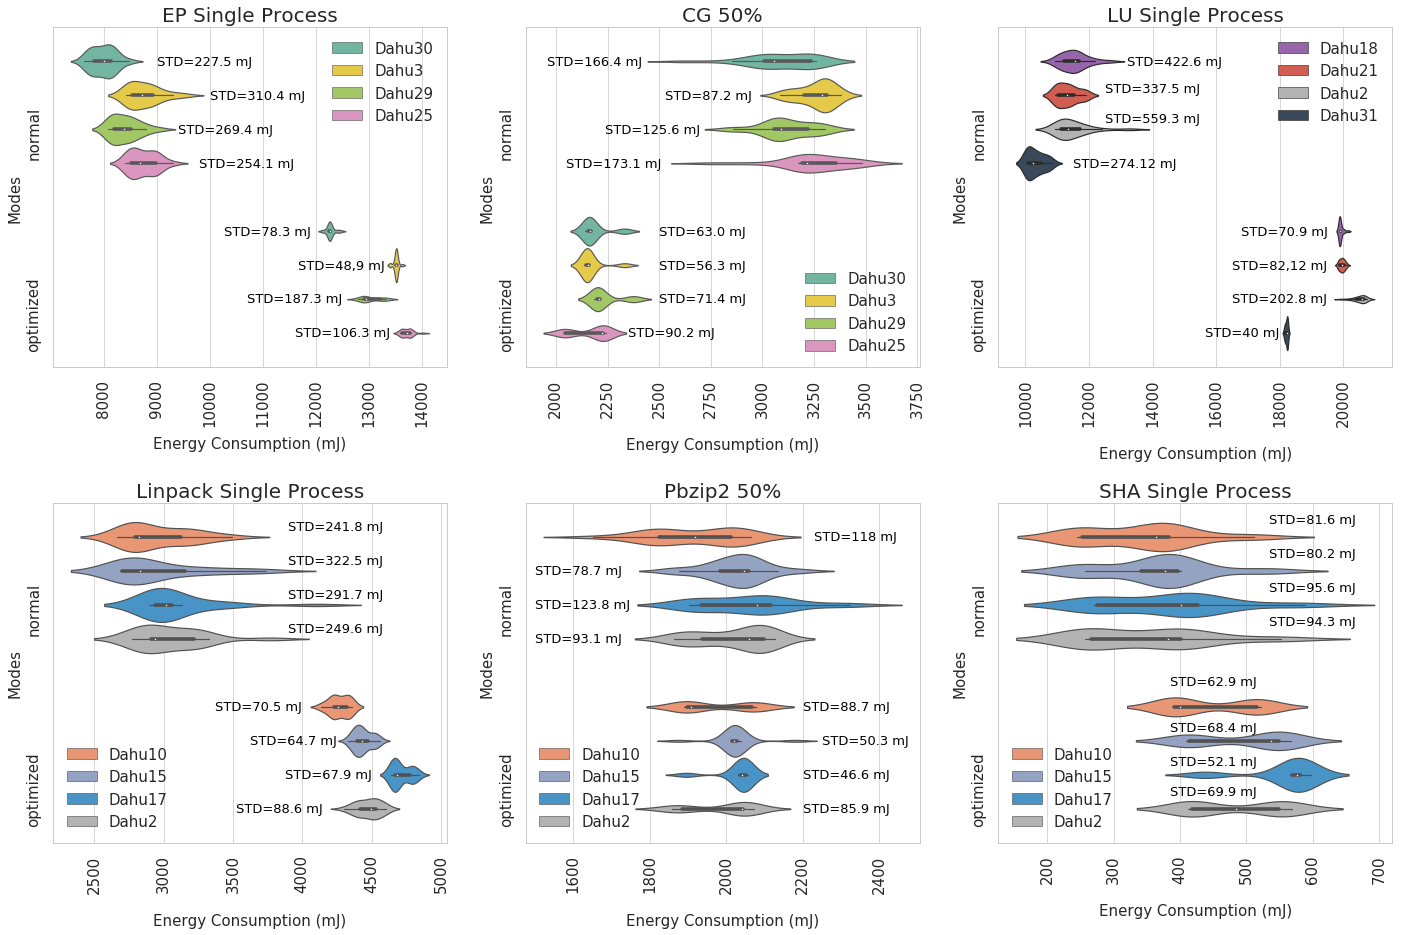

In [312]:
##### plt.style.use('seaborn')
sns.set_style("whitegrid") 
palette=sns.color_palette("Set2")
import matplotlib 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['besries']
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15,"axes.tickarams.size":20})
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
plt.subplots_adjust(wspace=0.2,hspace = 0.4 ,left = 0.05,right = 0.98)



data3=data.copy()
# data3=dtt.copy()
# matplotlib.rc('font', **font)
# matplotlib.set(context="paper",rc=)
# pass in the font dict as kwargs
# matplotlib.rc('xlabel', labelsize=20) 
# Using seaborn's style


# .loc[data2["sensor"]=="runningmodesxDahu2"]
# Plot CG
fig=sns.violinplot(data=data3.loc[data3["bench"]=="CG"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[0,1])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("CG 50%" )
fig.tick_params(labelsize=15,rotation=90)

fig.legend(loc=4,fontsize=15)
fig.text(y=-0.3,x=2420,s="STD=166.4 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=-0.1,x=2950,s="STD=87.2 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=0.1,x=2700,s="STD=125.6 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=0.3,x=2510,s="STD=173.1 mJ",ha="right", va="center",color="black",size=13)
############ optimized
fig.text(y=0.7,x=2500,s="STD=63.0 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.9,x=2500,s="STD=56.3 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=1.1,x=2500,s="STD=71.4 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=1.3,x=2350,s="STD=90.2 mJ",ha="left", va="center",color="black",size=13)
# Plot EP
fig=sns.violinplot(data=data3.loc[data3["bench"]=="EP"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[0,0])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=10)
fig.set_ylabel(ylabel="Modes")
fig.set_title("EP Single Process" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=1,fontsize=15)

fig.text(y=-0.3,x=9000,s="STD=227.5 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=-0.1,x=10000,s="STD=310.4 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.1,x=9400,s="STD=269.4 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.3,x=9800,s="STD=254.1 mJ",ha="left", va="center",color="black",size=13)
############ optimized
fig.text(y=0.7,x=11900,s="STD=78.3 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=0.9,x=13300,s="STD=48,9 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=1.1,x=12500,s="STD=187.3 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=1.3,x=13400,s="STD=106.3 mJ",ha="right", va="center",color="black",size=13)
# Plot LU
fig=sns.violinplot(data=data3.loc[data3["bench"]=="UL"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[0,2])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("LU Single Process" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=1,fontsize=15)

#printing the STDs
fig.text(y=-0.3,x=13200,s="STD=422.6 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=-0.14,x=12500,s="STD=337.5 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.04,x=12500,s="STD=559.3 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.3,x=11500,s="STD=274.12 mJ",ha="left", va="center",color="black",size=13)
############ optimized
fig.text(y=0.7,x=19500,s="STD=70.9 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=0.9,x=19500,s="STD=82,12 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=1.1,x=19500,s="STD=202.8 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=1.3,x=18000,s="STD=40 mJ",ha="right", va="center",color="black",size=13)
########
# Plot linpack
fig=sns.violinplot(data=data3.loc[data3["bench"]=="linpack"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[1,0])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("Linpack Single Process" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=3,fontsize=15)

#printing the STDs
fig.text(y=-0.36,x=3900,s="STD=241.8 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=-0.16,x=3900,s="STD=322.5 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.04,x=3900,s="STD=291.7 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.24,x=3900,s="STD=249.6 mJ",ha="left", va="center",color="black",size=13)
############ optimized
fig.text(y=0.7,x=4000,s="STD=70.5 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=0.9,x=4250,s="STD=64.7 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=1.1,x=4500,s="STD=67.9 mJ",ha="right", va="center",color="black",size=13)
fig.text(y=1.3,x=4150,s="STD=88.6 mJ",ha="right", va="center",color="black",size=13)
########

# ,hsapce=0.2
# Plot pbzip
fig=sns.violinplot(data=data3.loc[data3["bench"]=="pbzip"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[1,1])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("Pbzip2 50%" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=3,fontsize=15)

#printing the STDs
fig.text(y=-0.3,x=2230,s="STD=118 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=-0.1,x=1500,s="STD=78.7 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.1,x=1500,s="STD=123.8 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.3,x=1500,s="STD=93.1 mJ",ha="left", va="center",color="black",size=13)
############ optimized
fig.text(y=0.7,x=2200,s="STD=88.7 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=0.9,x=2250,s="STD=50.3 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=1.1,x=2200,s="STD=46.6 mJ",ha="left", va="center",color="black",size=13)
fig.text(y=1.3,x=2200,s="STD=85.9 mJ",ha="left", va="center",color="black",size=13)
########

# Plot sha

fig=sns.violinplot(data=data3.loc[data3["bench"]=="sha"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[1,2])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("SHA Single Process" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=3,fontsize=15)

#printing the STDs
fig.text(y=-0.4,x=600,s="STD=81.6 mJ",ha="center", va="center",color="black",size=13)
fig.text(y=-0.2,x=600,s="STD=80.2 mJ",ha="center", va="center",color="black",size=13)
fig.text(y=0,x=600,s="STD=95.6 mJ",ha="center", va="center",color="black",size=13)
fig.text(y=0.2,x=600,s="STD=94.3 mJ",ha="center", va="center",color="black",size=13)
############ optimized
fig.text(y=0.55,x=450,s="STD=62.9 mJ",ha="center", va="center",color="black",size=13)
fig.text(y=0.82,x=450,s="STD=68.4 mJ",ha="center", va="center",color="black",size=13)
fig.text(y=1.02,x=450,s="STD=52.1 mJ",ha="center", va="center",color="black",size=13)
fig.text(y=1.2,x=450,s="STD=69.9 mJ",ha="center", va="center",color="black",size=13)
########
# Plot Stress

# fig=sns.violinplot(data=data3.loc[np.logical_and(data3["bench"]=="Stress",data3["class"]=="C")],y="type",hue="Machine",x="cpu",palette=palette,ax=axes[1,2])
# fig.set_xlabel(xlabel="EC (mJ)")
# fig.set_ylabel(ylabel="Modes")
# fig.set_title("Stress-ng 50%" )
# fig.tick_params(labelsize=18)
# fig.legend(loc=1)




## adjust lines 
plt.savefig("all.pdf",format="pdf")

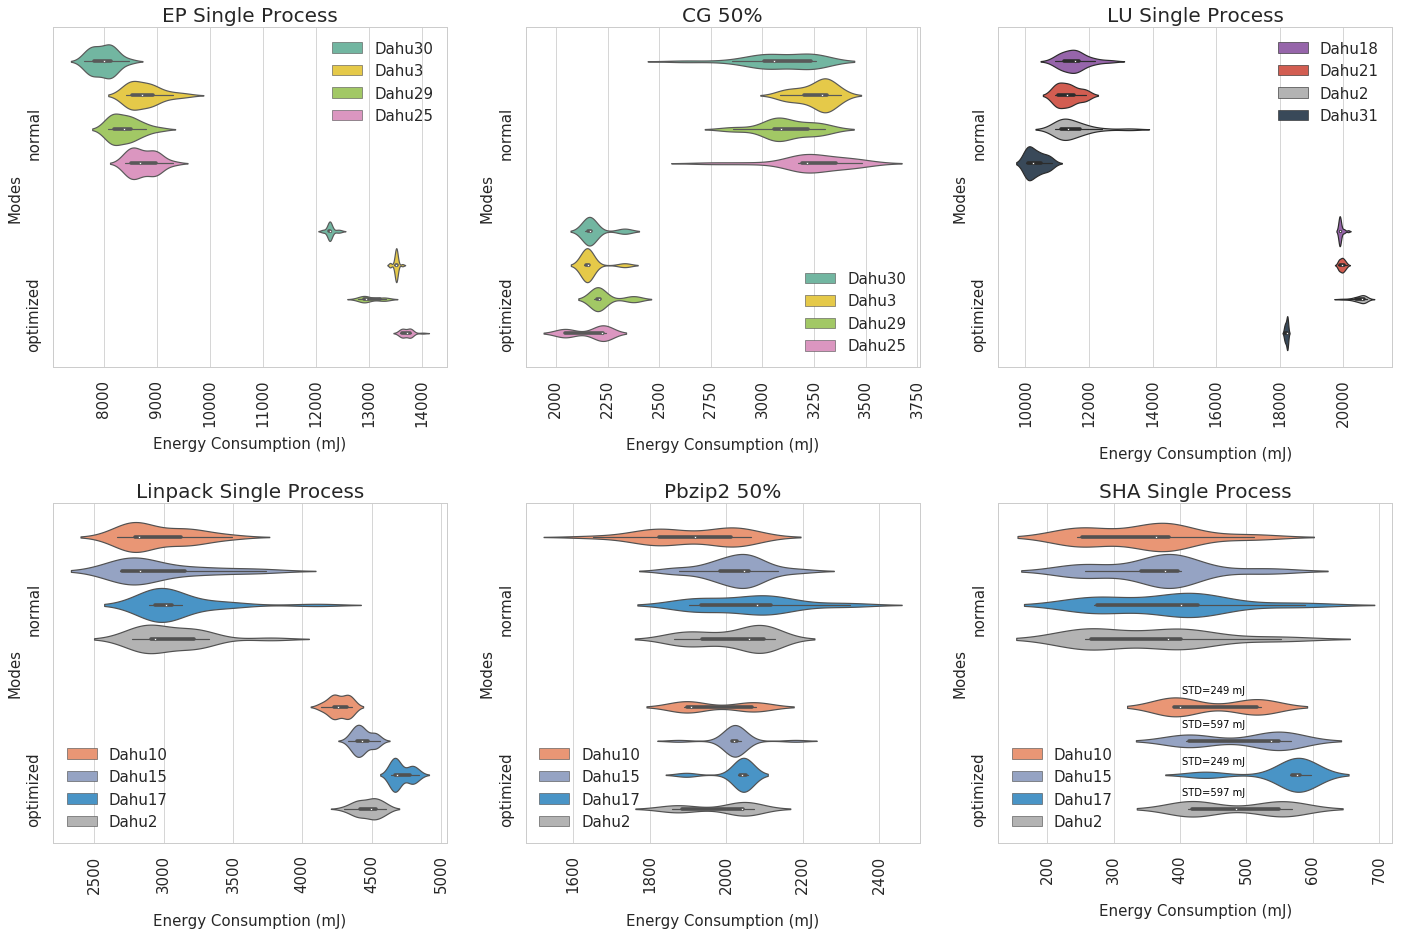

In [269]:
##### plt.style.use('seaborn')
sns.set_style("whitegrid") 
palette=sns.color_palette("Set2")
import matplotlib 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['besries']
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15,"axes.tickarams.size":20})
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
plt.subplots_adjust(wspace=0.2,hspace = 0.4 ,left = 0.05,right = 0.98)



data3=data.copy()

# matplotlib.rc('font', **font)
# matplotlib.set(context="paper",rc=)
# pass in the font dict as kwargs
# matplotlib.rc('xlabel', labelsize=20) 
# Using seaborn's style


# .loc[data2["sensor"]=="runningmodesxDahu2"]
# Plot CG
fig=sns.violinplot(data=data3.loc[data3["bench"]=="CG"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[0,1])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("CG 50%" )
fig.tick_params(labelsize=15,rotation=90)

fig.legend(loc=4,fontsize=15)

# Plot EP
fig=sns.violinplot(data=data3.loc[data3["bench"]=="EP"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[0,0])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=10)
fig.set_ylabel(ylabel="Modes")
fig.set_title("EP Single Process" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=1,fontsize=15)

# Plot EP
fig=sns.violinplot(data=data3.loc[data3["bench"]=="UL"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[0,2])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("LU Single Process" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=1,fontsize=15)

# Plot linpack
fig=sns.violinplot(data=data3.loc[data3["bench"]=="linpack"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[1,0])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("Linpack Single Process" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=3,fontsize=15)

# ,hsapce=0.2
# Plot pbzip
fig=sns.violinplot(data=data3.loc[data3["bench"]=="pbzip"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[1,1])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("Pbzip2 50%" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=3,fontsize=15)

# Plot sha

fig=sns.violinplot(data=data3.loc[data3["bench"]=="sha"],y="type",hue="Machine",x="cpu",palette=colors,ax=axes[1,2])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=20)
fig.set_ylabel(ylabel="Modes")
fig.set_title("SHA Single Process" )
fig.tick_params(labelsize=15,rotation=90)
fig.legend(loc=3,fontsize=15)

#printing the STDs
fig.text(y=0.6,x=450,s="STD=81.6 mJ",ha="center", va="center",color="black",size=10)
fig.text(y=0.8,x=450,s="STD=80. mJ",ha="center", va="center",color="black",size=10)
fig.text(y=1.02,x=450,s="STD=249 mJ",ha="center", va="center",color="black",size=10)
fig.text(y=1.2,x=450,s="STD=597 mJ",ha="center", va="center",color="black",size=10)
########
# Plot Stress

# fig=sns.violinplot(data=data3.loc[np.logical_and(data3["bench"]=="Stress",data3["class"]=="C")],y="type",hue="Machine",x="cpu",palette=palette,ax=axes[1,2])
# fig.set_xlabel(xlabel="EC (mJ)")
# fig.set_ylabel(ylabel="Modes")
# fig.set_title("Stress-ng 50%" )
# fig.tick_params(labelsize=18)
# fig.legend(loc=1)




## adjust lines 
plt.savefig("all.pdf",format="pdf")

In [177]:
def bootstrap(energy,groupbyobj="mode2",sampleSize=40): 
    l=[(energy.loc[energy[groupbyobj]==x ],x) for x in energy[groupbyobj].drop_duplicates() ]
#     l=[np.random.choice(x["cpu"], size=(5000, sampleSize))for x in l]
#     return l
    l=[(np.random.choice(i["cpu"], size=(5000, sampleSize)),j) for i,j in l ]
    l=[(np.std(i,1),j) for i,j in l]
    l2=[]
    for i,j in l:
        data=pd.DataFrame()
        data["val"]=i
        data[groupbyobj]=j
        l2.append(data)
    return l,pd.concat(l2)


energylu=data2.loc[data2["benchmark"]=="LU"]
e3,_=bootstrap(energylu)
e4,_=bootstrap(data3.loc[data2["benchmark"]=="LU"])

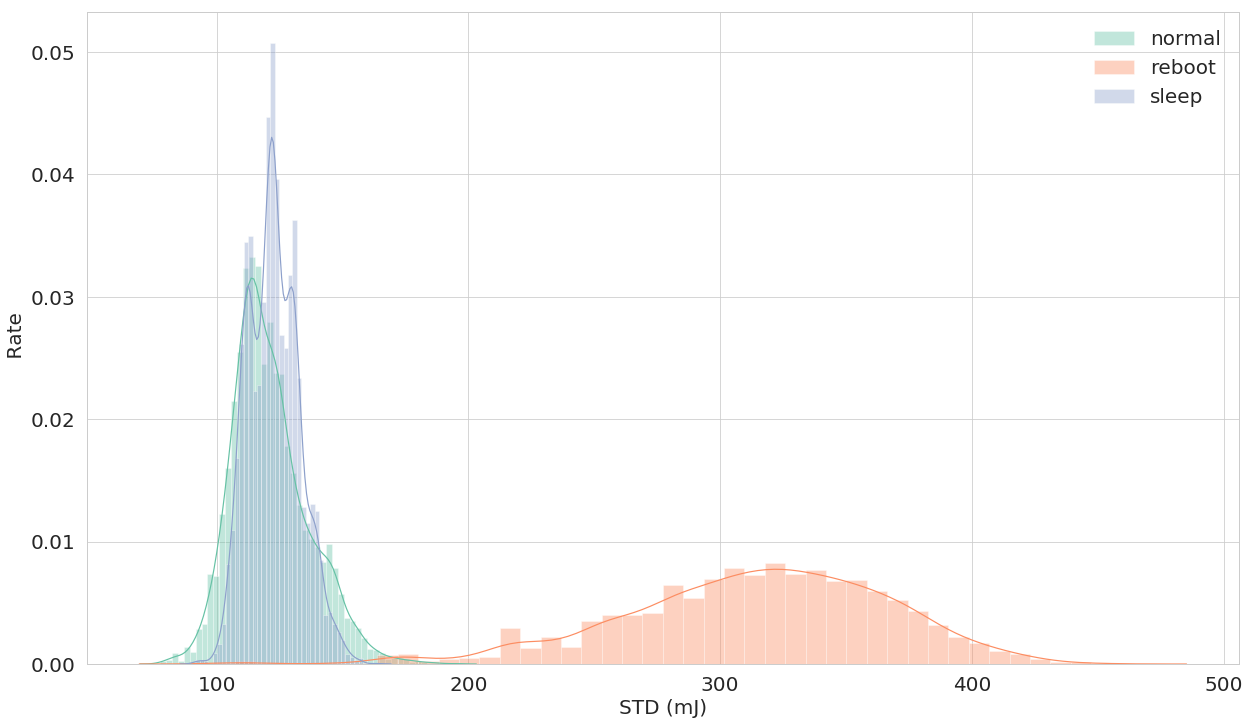

In [226]:

fig = plt.figure(figsize=(20,12))
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20,"axes.tickarams.size":20})
plt.subplots_adjust(left = 0.1,right = 0.9)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_style("whitegrid")
colors={"normal":palette[0],"reboot":palette[1],"sleep":palette[2]}
for i,j in e3: 
    fig=sns.distplot(i,label=j,color=colors[j])
fig.legend(fontsize=20,)
fig.set_xlabel(xlabel="STD (mJ)")
fig.set_ylabel(ylabel=" Rate")
plt.savefig("reboot.png",format="pdf")

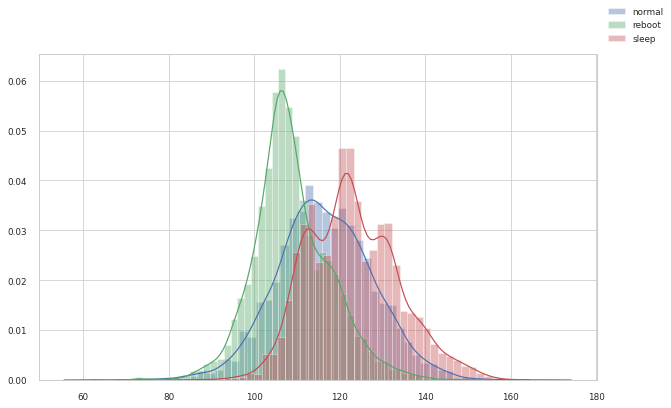

In [178]:
fig = plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
legends=[]
for i,j in e4: 
    sns.distplot(i,label=j)
    legends.append(j)
fig.legend(labels=legends)

plt.show()